<a href="https://colab.research.google.com/github/1moi6/pyfuzzy-toolbox/blob/main/notebooks_colab/04_dynamics/01_pfuzzy_discrete_predator_prey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema p-Fuzzy Discreto: Logistic Growth

## 📘 Introdução

Este notebook implementa um **sistema dinâmico p-fuzzy discreto** para modelar a interação entre **presas e predadores**, baseado no exemplo do livro:

> Barros, L. C., Bassanezi, R. C., & Lodwick, W. A. (2017).  
> *A First Course in Fuzzy Logic, Fuzzy Dynamical Systems, and Biomathematics*

---

## 🎯 O que é um Sistema p-Fuzzy?

Um **sistema p-fuzzy** é um sistema dinâmico onde a função de evolução é definida por **regras fuzzy** ao invés de equações matemáticas explícitas.

### Sistema Discreto:
$$x_{n+1} = x_n + f(x_n)$$

Onde $f(x_n)$ é determinado por um **Sistema de Inferência Fuzzy (FIS)**.

---

## 🦊 Modelo Predador-Presa

O modelo clássico de Lotka-Volterra descreve a interação entre duas espécies:
- **Presas** (população x₁)
- **Predadores** (população x₂)

### Regras Fuzzy do Livro (Figura 4.15):

A base de regras considera **4 níveis linguísticos** para cada espécie:
- **B** (Baixa)
- **MB** (Média-Baixa)  
- **MA** (Média-Alta)
- **A** (Alta)

E define **16 regras** que determinam a variação populacional.

---

## 🚀 Vamos começar!

## Instalação e Imports

In [ ]:
# Instalar pyfuzzy-toolbox
!pip install pyfuzzy-toolbox matplotlib numpy -q

In [1]:
import fuzzy_systems as fs
import numpy as np
import matplotlib.pyplot as plt

print("✅ Bibliotecas importadas com sucesso!")

✅ MamdaniLearning implementado com sucesso!

Características:
  • Aprendizado por gradiente: batch, online, mini-batch
  • Otimização metaheurística: PSO, DE, GA
  • Defuzzificação: COG e COS
  • Caching de ativações para otimização eficiente
  • Extração de regras linguísticas
✅ Módulo de EDO Fuzzy implementado com sucesso!

Características:
  • Integração completa com fuzzy_systems.core
  • Suporte a FuzzySet, triangular, gaussiana, trapezoidal
  • Método de α-níveis vetorizado
  • Paralelização automática (joblib)
  • Condições iniciais e parâmetros fuzzy
  • Visualização de envelopes por α-nível
✅ Bibliotecas importadas com sucesso!


---

## 1️⃣ Criar o Sistema de Inferência Fuzzy

Vamos criar um FIS que implementa as **16 regras fuzzy** do livro.

In [10]:
# Criar sistema Mamdani para predador-presa
fis = fs.MamdaniSystem(name="Population")

# ========================================
# ENTRADAS: Presas (x) e Predadores (y)
# ========================================

# Universo de discurso: [0, 100] para ambas
fis.add_input('population', (0, 100))
fis.add_term('population', 'B', 'gaussian', (0, 12))    # Baixa
fis.add_term('population', 'MB', 'gaussian', (34, 12))   # Média-Baixa
fis.add_term('population', 'MA', 'gaussian', (67, 12))   # Média-Alta
fis.add_term('population', 'A', 'gaussian', (100, 12))    # Alta


In [12]:
# ========================================
# SAÍDAS: Variação de Presas e Predadores
# ========================================

# Saída 1: Δprey (variação de presas)
fis.add_output('v_population', (-5, 5))
fis.add_term('v_population', 'declinio', 'triangular', (-5, 0, 0))
fis.add_term('v_population', 'crescimento_leve', 'triangular', (0, 0, 5))
fis.add_term('v_population', 'crescimento_medio', 'triangular', (0, 5, 10))
fis.add_term('v_population', 'crescimento_forte', 'triangular', (5, 10, 10))


In [22]:
# ========================================
# BASE DE REGRAS (16 regras)
# ========================================

# Definir matriz de saídas conforme Figura 4.15 do livro
# Formato: (saída_prey, saída_predator)
fis.add_rule({'population':'B'},{'v_population':'crescimento_forte'})
fis.add_rule({'population':'MB'},{'v_population':'crescimento_medio'})
fis.add_rule({'population':'MA'},{'v_population':'crescimento_leve'})
fis.add_rule({'population':'A'},{'v_population':'declinio'})


---

## 2️⃣ Criar o Sistema p-Fuzzy Discreto

Agora vamos criar o sistema dinâmico discreto usando `PFuzzyDiscrete`.

In [ ]:
# Criar sistema p-fuzzy discreto
pfuzzy = fs.dynamics.PFuzzyDiscrete(
    fis=fis,
    mode='absolute',  # x_{n+1} = x_n + f(x_n)
    dt=1.0  # Passo de tempo (1 unidade)
)

print("✅ Sistema p-Fuzzy Discreto criado!")
print(f"\n📊 Configuração:")
print(f"   • Modo: absolute (x_n+1 = x_n + Δx)")
print(f"   • Variáveis de estado: {pfuzzy.state_vars}")
print(f"   • Passo de tempo: dt = {pfuzzy.dt}")

✅ Sistema p-Fuzzy Discreto criado!

📊 Configuração:
   • Modo: absolute (x_n+1 = x_n + Δx)
   • Variáveis de estado: ['population']
   • Passo de tempo: dt = 1.0


---

## 3️⃣ Simulação do Sistema

Vamos simular o sistema com diferentes condições iniciais.

In [25]:
# Condições iniciais (mesmas do livro)
x0 = {'population': 50}

# Número de passos de tempo
n_steps = 100


# Simular
trajectory = pfuzzy.simulate(x0=x0, n_steps=n_steps)


---

## 4️⃣ Visualizações

### 📊 Dinâmica Temporal

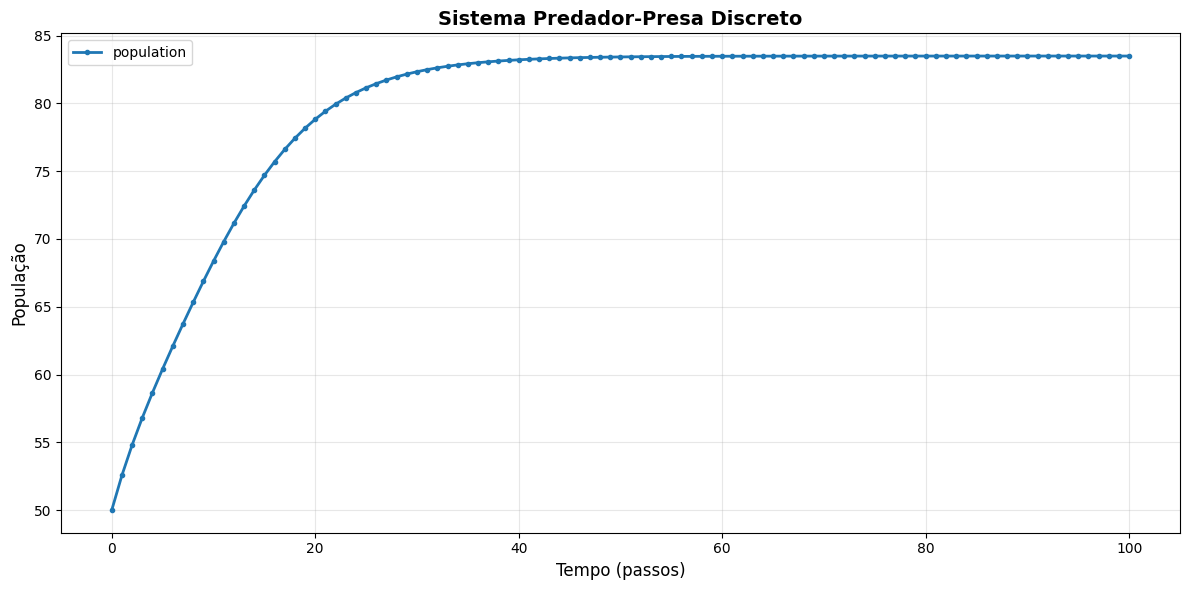

In [26]:
# Plot da dinâmica temporal
fig, ax = pfuzzy.plot_trajectory(
    figsize=(12, 6),
    title='Sistema Predador-Presa Discreto',
    xlabel='Tempo (passos)',
    ylabel='População'
)

plt.show()

### 🔄 Espaço de Fase

O **espaço de fase** mostra a trajetória no plano (presas × predadores).

---

## 5️⃣ Múltiplas Condições Iniciais

Vamos testar diferentes populações iniciais para observar o comportamento do sistema.

🔄 Simulando múltiplas condições iniciais...



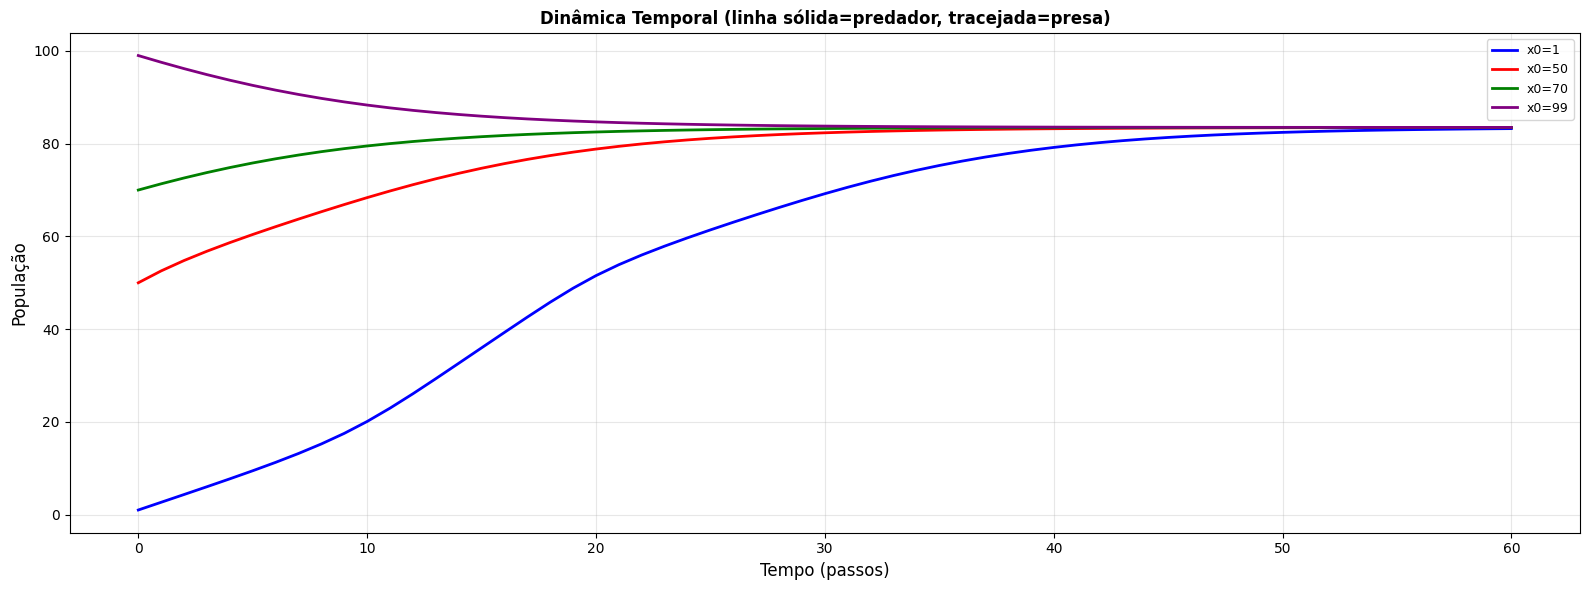


✅ Simulações concluídas!


In [36]:
# Diferentes condições iniciais
initial_conditions = [
    {'population': 1},
    {'population': 50},
    {'population': 70},
    {'population': 99}
]

colors = ['blue', 'red', 'green', 'purple']

# Criar figura
fig, ax1 = plt.subplots(figsize=(16, 6))

print("🔄 Simulando múltiplas condições iniciais...\n")

for i, x0 in enumerate(initial_conditions):
    
    # Simular
    traj = pfuzzy.simulate(x0=x0, n_steps=60)
    time = pfuzzy.time
    
    # Plot temporal
    ax1.plot(time, traj[:, 0], color=colors[i], alpha=1, linewidth=2,label=f'x0={x0["population"]}')
    
# Configurar plot temporal
ax1.set_xlabel('Tempo (passos)', fontsize=12)
ax1.set_ylabel('População', fontsize=12)
ax1.set_title('Dinâmica Temporal (linha sólida=predador, tracejada=presa)', 
              fontsize=12, fontweight='bold')
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Simulações concluídas!")

---

## 6️⃣ Exportar Resultados

Podemos exportar a trajetória para um arquivo CSV.

In [ ]:
# Exportar para CSV
pfuzzy.to_csv('/tmp/predator_prey_discrete.csv')

print("✅ Dados exportados para: /tmp/predator_prey_discrete.csv")
print("\n📄 Primeiras 5 linhas:")

# Ler e mostrar primeiras linhas
import pandas as pd
df = pd.read_csv('/tmp/predator_prey_discrete.csv')
print(df.head())